<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.3: Stacking

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [ ]:
# The primary business objective is to improve the accuracy of predicting whether a tumor is benign or malignant.
This is crucial because accurate classification directly impacts patient care and treatment decisions.
Better predictive performance means fewer false positives and false negatives,
which can lead to improved patient outcomes and more efficient use of medical resources.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [3]:
df = pd.read_csv('breast-cancer-wisconsin-data-old.csv')

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
df.head

<bound method NDFrame.head of      Sample_number  Clump_Thickness  Cell_Size_Uniformity  \
0          1000025                5                     1   
1          1002945                5                     4   
2          1015425                3                     1   
3          1016277                6                     8   
4          1017023                4                     1   
..             ...              ...                   ...   
694         776715                3                     1   
695         841769                2                     1   
696         888820                5                    10   
697         897471                4                     8   
698         897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        1                  1                            2   
1                        4                  5                            7   
2  

In [6]:
df.info

<bound method DataFrame.info of      Sample_number  Clump_Thickness  Cell_Size_Uniformity  \
0          1000025                5                     1   
1          1002945                5                     4   
2          1015425                3                     1   
3          1016277                6                     8   
4          1017023                4                     1   
..             ...              ...                   ...   
694         776715                3                     1   
695         841769                2                     1   
696         888820                5                    10   
697         897471                4                     8   
698         897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        1                  1                            2   
1                        4                  5                            7   
2

In [6]:
df.describe

<bound method NDFrame.describe of      Sample_number  Clump_Thickness  Cell_Size_Uniformity  \
0          1000025                5                     1   
1          1002945                5                     4   
2          1015425                3                     1   
3          1016277                6                     8   
4          1017023                4                     1   
..             ...              ...                   ...   
694         776715                3                     1   
695         841769                2                     1   
696         888820                5                    10   
697         897471                4                     8   
698         897471                4                     8   

     Cell_Shape_Uniformity  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                        1                  1                            2   
1                        4                  5                            7   

In [11]:
df.isnull().sum()

Sample_number                  0
Clump_Thickness                0
Cell_Size_Uniformity           0
Cell_Shape_Uniformity          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [13]:
df.drop(columns=['Sample_number'], inplace=True)

In [15]:
df.replace('?', np.nan, inplace=True)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'])
df.head

<bound method NDFrame.head of      Clump_Thickness  Cell_Size_Uniformity  Cell_Shape_Uniformity  \
0                  5                     1                      1   
1                  5                     4                      4   
2                  3                     1                      1   
3                  6                     8                      8   
4                  4                     1                      1   
..               ...                   ...                    ...   
694                3                     1                      1   
695                2                     1                      1   
696                5                    10                     10   
697                4                     8                      6   
698                4                     8                      8   

     Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                    1                            2          1.0   
1    

In [17]:
#Drop rows with missing values
df.dropna(inplace=True)

In [19]:
# Change class labels from 2/4 to 0/1
df['Class'] = df['Class'].map({2: 0, 4: 1})

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [171]:
#Features and target variable
X = df.drop(columns=['Class'])
y = df['Class']


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [175]:
rf_params = {'n_estimators': 100, 'max_depth': 10}
gb_params = {'n_estimators': 100, 'learning_rate': 0.1}
svc_params = {'kernel': 'linear', 'probability': True}  # 

In [115]:
class SklearnHelper:
    def __init__(self, clf, seed, params):
        self.clf = clf
        self.seed = seed
        self.params = params
        self.model = clf(random_state=seed, **params)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)


In [177]:
rf = SklearnHelper(clf=RandomForestClassifier, seed=42, params=rf_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=42, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=42, params=svc_params)

In [179]:
n_splits = 5  # Number of folds
kf = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)


In [181]:
oof_preds_rf = np.zeros(X_train.shape[0])
oof_preds_gb = np.zeros(X_train.shape[0])
oof_preds_svc = np.zeros(X_train.shape[0])
test_preds_rf = np.zeros(X_test.shape[0])
test_preds_gb = np.zeros(X_test.shape[0])
test_preds_svc = np.zeros(X_test.shape[0])

In [183]:
# Iterate through each fold
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [186]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42, **rf_params)
gb_model = GradientBoostingClassifier(random_state=42, **gb_params)
svc_model = SVC(**svc_params) 

In [188]:
# Fit models on the training fold
rf_model.fit(X_train_fold, y_train_fold)
gb_model.fit(X_train_fold, y_train_fold)
svc_model.fit(X_train_fold, y_train_fold)

SVC(kernel='linear', probability=True)

In [190]:
# Predict OOF for validation fold
oof_preds_rf[val_index] = rf_model.predict_proba(X_val_fold)[:, 1]
oof_preds_gb[val_index] = gb_model.predict_proba(X_val_fold)[:, 1]
oof_preds_svc[val_index] = svc_model.predict_proba(X_val_fold)[:, 1]
    

In [192]:
# Predict on the test set
test_preds_rf += rf_model.predict_proba(X_test)[:, 1] / n_splits
test_preds_gb += gb_model.predict_proba(X_test)[:, 1] / n_splits
test_preds_svc += svc_model.predict_proba(X_test)[:, 1] / n_splits

In [194]:
# Create a DataFrame for OOF predictions
X_meta_train = np.vstack((oof_preds_rf, oof_preds_gb, oof_preds_svc)).T


In [198]:
# Define and train the meta-model
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

LogisticRegression()

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [200]:
X_meta_test = np.vstack((test_preds_rf, test_preds_gb, test_preds_svc)).T
meta_model_preds = meta_model.predict_proba(X_meta_test)[:, 1]


In [202]:
# Evaluate the meta-model
print('ROC AUC Score for Meta-Model:', roc_auc_score(y_test, meta_model_preds))


ROC AUC Score for Meta-Model: 0.9960629921259841


In [204]:
from sklearn.metrics import confusion_matrix, classification_report

In [206]:
y_test_pred = meta_model.predict(X_meta_test)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[[127   0]
 [ 78   0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       127
           1       0.00      0.00      0.00        78

    accuracy                           0.62       205
   macro avg       0.31      0.50      0.38       205
weighted avg       0.38      0.62      0.47       205



C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [208]:
coefs = meta_model.coef_[0]
model_names = ['RF_Prob', 'GB_Prob', 'SVC_Prob']

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Model': model_names, 'Coefficient': coefs})
print(importance_df)


      Model  Coefficient
0   RF_Prob     0.921244
1   GB_Prob     1.293894
2  SVC_Prob     1.092274


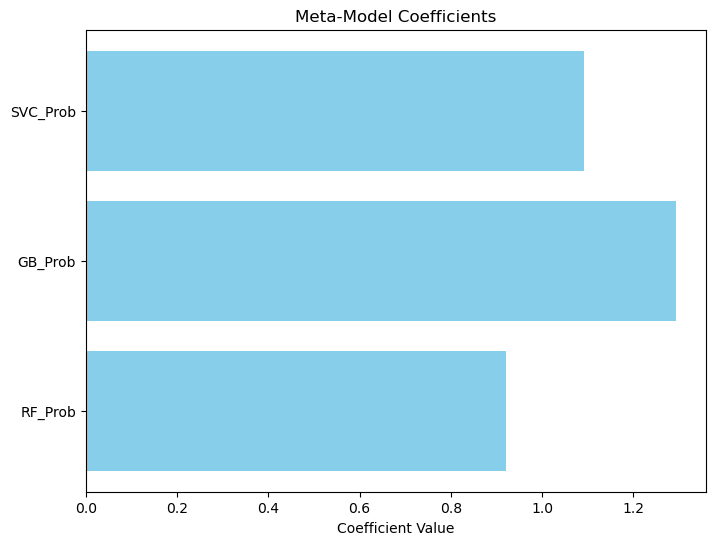

In [226]:
feature_names = ['RF_Prob', 'GB_Prob', 'SVC_Prob']
coefs = meta_model.coef_[0]
plt.figure(figsize=(8, 6))
plt.barh(feature_names, coefs, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Meta-Model Coefficients')
plt.show()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



